In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# %matplotlib widget

from simulation import Simulation

from models.building_model import BuildingModel
from models.heat_pump import HeatPump
from models.hyst_controller import HystController
from models.weather_model import LocalWeather

c:\Users\seva\AppData\Local\miniconda3\envs\flecsframework_0_1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
sim = Simulation()

In [4]:
l = 2
buildings_list   = [BuildingModel(f'building_{i}') for i in range(l)]
heatpumps_list   = [HeatPump(f'heatpump_{i}') for i in range(l)]
controllers_list = [HystController(f'controller_{i}') for i in range(l)]
weathers_list    = [LocalWeather(f'weather_{i}') for i in range(l)]

for building, heatpump, controller, weather in zip(buildings_list, heatpumps_list, controllers_list, weathers_list):
    sim.add_model(building)
    sim.add_model(heatpump)
    sim.add_model(controller)
    sim.add_model(weather)

In [5]:
for building, heatpump, controller, weather in zip(buildings_list, heatpumps_list, controllers_list, weathers_list):
    sim.connect(weather, building, ('T_air', 'T_amb'), 'apparent_zenith', 'azimuth', 'dni', 'dhi', 'ghi')
    sim.connect(weather, heatpump, ('T_air', 'T_source'))
    sim.connect(heatpump, building, ('dot_Q_hp', 'dot_Q_heat'))
    sim.connect(controller, heatpump, ('on', 'on'))

    sim.connect(building, heatpump, ('T_room1', 'T_sink'), time_shifted=True, init_values={'T_room1': 21})
    sim.connect(building, controller, ('T_room1', 'T_is'), time_shifted=True, init_values={'T_room1': 21})

In [6]:
sim.prepare()

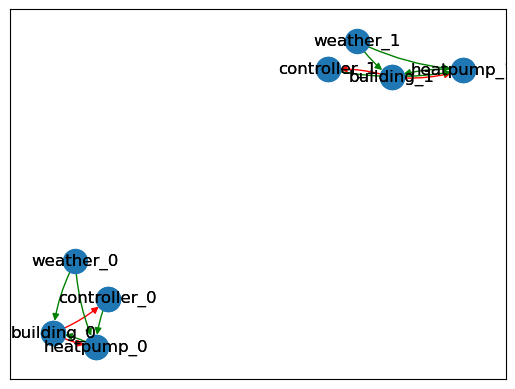

In [7]:
sim.draw_exec_graph()

In [8]:
times = pd.date_range('2021-01-01 00:00:00', '2021-01-01 23:59:00', freq='1min', tz='UTC+01:00')
# times = pd.date_range('2021-01-01 00:00:00', '2021-01-02 00:00:00', freq='1min', tz='UTC+01:00')

sim.run(times)

c:\Users\seva\OneDrive - FH Vorarlberg\Dokumente\01 Projekte\03 Hub4Flecs\Flexframeworktest\own_implementation\simulation.py:213: FutureWarning: Minute.delta is deprecated and will be removed in a future version. Use pd.Timedelta(obj) instead
  delta_index  = datetimes.freq.delta.seconds
Progress: 100%|██████████| 1440/1440 [00:06<00:00, 214.31Steps/s]


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
C:\Users\seva\AppData\Local\Temp\ipykernel_7608\1634738580.py:13: SyntaxWarning: invalid escape sequence '\d'
  ax[1].plot(dtindex, df['building_1_dot_Q_sol'], label='$\dot{Q}_{sol}$', drawstyle='steps-post')
C:\Users\seva\AppData\Local\Temp\ipykernel_7608\1634738580.py:14: SyntaxWarning: invalid escape sequence '\d'
  ax[1].plot(dtindex, df['heatpump_1_dot_Q_hp'], label='$\dot{Q}_{hp}$', drawstyle='steps-post')
C:\Users\seva\AppData\Local\Temp\ipykernel_7608\1634738580.py:3: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.interpolate('ffill', inplace=True)


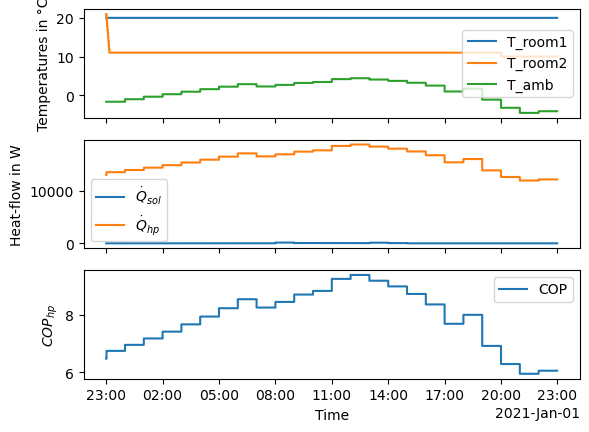

In [9]:
df = sim.df

df.interpolate('ffill', inplace=True)
dtindex = df.index 
fig, ax = plt.subplots(3, sharex=True)
# Roomtemperatures
ax[0].plot(dtindex, df['building_1_T_room1'], label='T_room1', drawstyle='steps-post')
ax[0].plot(dtindex, df['building_1_T_room2'], label='T_room2', drawstyle='steps-post')
ax[0].plot(dtindex, df['weather_1_T_air'], label='T_amb', drawstyle='steps-post')
ax[0].legend()
ax[0].set_ylabel('Temperatures in °C')

ax[1].plot(dtindex, df['building_1_dot_Q_sol'], label='$\dot{Q}_{sol}$', drawstyle='steps-post')
ax[1].plot(dtindex, df['heatpump_1_dot_Q_hp'], label='$\dot{Q}_{hp}$', drawstyle='steps-post')
ax[1].legend()
ax[1].set_ylabel('Heat-flow in W')

ax[2].plot(dtindex, df['heatpump_1_cop'], label='COP', drawstyle='steps-post')
ax[2].legend()
ax[2].set_ylabel('$COP_{hp}$')

ax[-1].set_xlabel('Time')
ax[-1].xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax[-1].xaxis.get_major_locator(),))